# <font color='33E8FF' size='5'><b>Problem Statement</b></font>

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


**Business Objective**

The aim is to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:


*   Which variables are significant in predicting the demand for shared bikes.
*   How well those variables describe the bike demands



# <font color='33E8FF' size='5'><b>Reading and Understanding Data</b></font>

We will import the dataset and understand the varaibles and its contents

In [132]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [133]:
# suppress the warnings
import warnings
warnings.filterwarnings('ignore')

In [134]:
#read the dataset into the datframe
bike_df=pd.read_csv("day.csv")

In [135]:
# Check the head of the dataset
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [136]:
#shape of the dataframe
bike_df.shape

(730, 16)

In [137]:
#information about the dataframe
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [138]:
#describe the numerical variable of the data frame
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<font color='Green' size='3'><b>Inference :</b></font> There are 16 coloumns and 730 rows. There are no null values in the dataset.

#<font color='33E8FF' size='5'><b>Data **Visualization**</b></font>

* We will check does some multicollinearity between diffrent variables exist.<br>
* Identify which predictors directly have a strong association with the outcome variable **CNT**<br>
* Identify Variables which have no relation with dependent variable,have high variance or have leaky features 


In [8]:
# lets validate the value counts for all the columns
for i in bike_df.columns:
    print(i, bike_df[i].value_counts())


instant 1      1
480    1
482    1
483    1
484    1
      ..
246    1
247    1
248    1
249    1
730    1
Name: instant, Length: 730, dtype: int64
dteday 01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64
season 3    188
2    184
1    180
4    178
Name: season, dtype: int64
yr 0    365
1    365
Name: yr, dtype: int64
mnth 1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64
holiday 0    709
1     21
Name: holiday, dtype: int64
weekday 6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64
workingday 1    499
0    231
Name: workingday, dtype: int64
weathersit 1    463
2    246
3     21
Name: weathersit, dtype: int64
temp 26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..


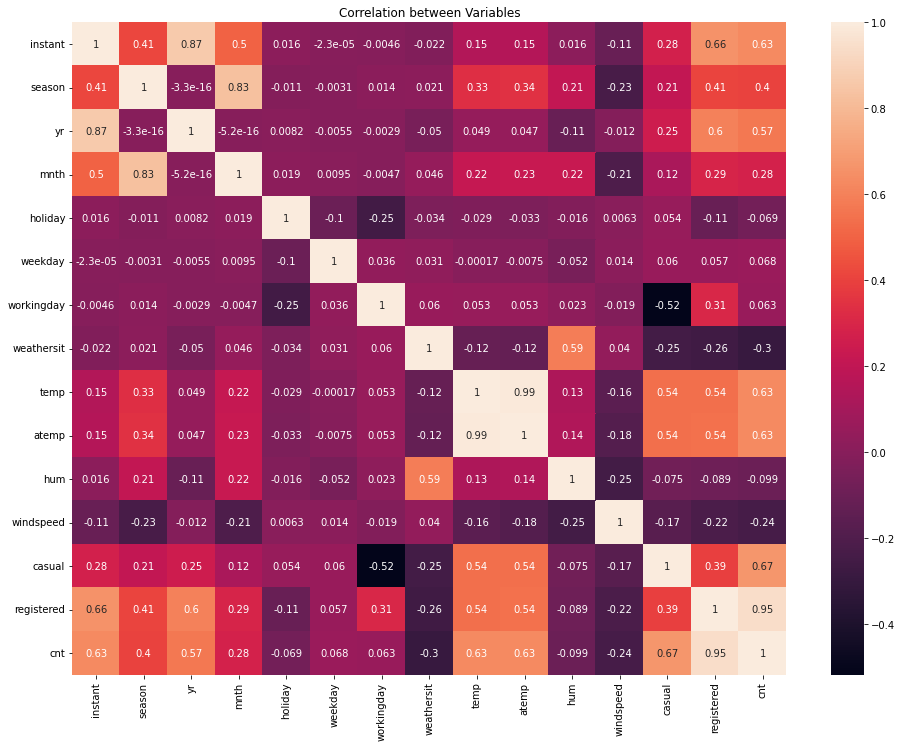

In [9]:
# lets visualize the coorelation for all the columns and for dependent variable
plt.figure(figsize = (16, 12))
hm = sns.heatmap(bike_df.corr(), annot = True)
hm.set_title('Correlation between Variables')
plt.show()


<font color='Green' size='3'><b>Inference :</b></font> 
From the above observations we can conclude the following:


*   Variable **instant** and **dteday** have a high variance 
*   Variable **casual** is a leaky feature and its existance cannot be guranteed while prediction on actual data
*   Variable **temp** and **atemp** have high level of multicollinearity


We would be dropping those columns from our data set and this would add lot of disturbance and noise to our analysis





#<font color='33E8FF' size='5'><b>Data Handling/ Cleansing</b></font>

Here we will perform the following:

1.   Dropping the columns identified above
2.   Clean the values and impute proper values for Variables
3.   Adjust the datatypes for Categorical Variables
4.   Treating Outliers




In [10]:
#droping the variable instant,dteday,casual,atemp from the data set
bike_df.drop(columns = ['instant','dteday','casual','atemp'],inplace=True)

In [11]:
# get the new shape of the data frame
bike_df.shape

(730, 12)

In [12]:
# get vaule counts for season
bike_df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [13]:
# formulate season with values as season (1:spring, 2:summer, 3:fall, 4:winter)
def season_value(x):
  if x == 1: return 'spring'
  elif x == 2: return 'summer'
  elif x == 3: return 'fall'
  elif x == 4: return 'winter'
bike_df.season = bike_df.season.apply(season_value)


In [14]:
# get vaule counts for season
bike_df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [15]:
# get vaule counts for year
bike_df.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

In [16]:
#formulate year yr : year (0: 2018, 1:2019)
bike_df.yr = bike_df.yr.apply(lambda x : '2018' if x == 0 else '2019' )

In [17]:
# get vaule counts for year
bike_df.yr.value_counts()

2018    365
2019    365
Name: yr, dtype: int64

In [18]:
# get vaule counts for month
bike_df.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [19]:
# formulate month ( 1 to 12)
def month_value(x):
  if x == 1: return 'January'
  elif x == 2: return 'February'
  elif x == 3: return 'March'
  elif x == 4: return 'April'
  elif x == 5: return 'May'
  elif x == 6: return 'June'
  elif x == 7: return 'July'
  elif x == 8: return 'August'
  elif x == 9: return 'September'
  elif x == 10: return 'October'
  elif x == 11: return 'November'
  elif x == 12: return 'December'
bike_df.mnth = bike_df.mnth.apply(month_value)
# get vaule counts for month
bike_df.mnth.value_counts()

January      62
March        62
May          62
July         62
August       62
October      62
December     62
April        60
June         60
September    60
November     60
February     56
Name: mnth, dtype: int64

In [20]:
# get vaule counts for holiday
bike_df.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [21]:
#formulate holiday : 0:Not-holiday and 1:Holiday
bike_df.holiday = bike_df.holiday.apply(lambda x : 'Not-holiday' if x == 0 else 'Holiday' )
bike_df.holiday.value_counts()

Not-holiday    709
Holiday         21
Name: holiday, dtype: int64

In [22]:
# get vaule counts for holiday
bike_df.weekday.value_counts()

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [23]:
# formulate weekday and replace 0 to 7
# weekday : day of the week ( 1 = Monday, 2 = Tuesay, 3 = Wednesday....7 = Sunday)
bike_df.weekday.replace(0,7, inplace=True)
#
def weekday_value(x):
  if x == 1: return 'Monday'
  elif x == 2: return 'Tuesday'
  elif x == 3: return 'Wednesday'
  elif x == 4: return 'Thursday'
  elif x == 5: return 'Friday'
  elif x == 6: return 'Saturday'
  elif x == 7: return 'Sunday'
bike_df.weekday = bike_df.weekday.apply(weekday_value)
# get vaule counts for weekday
bike_df.weekday.value_counts()

Saturday     105
Sunday       105
Monday       105
Tuesday      104
Thursday     104
Friday       104
Wednesday    103
Name: weekday, dtype: int64

In [24]:
# get vaule counts for workingday
bike_df.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [25]:
#formulate workingday : 0:Not-working and 1:Working
bike_df.workingday = bike_df.workingday.apply(lambda x : 'Not-working' if x == 0 else 'Working' )
bike_df.workingday.value_counts()

Working        499
Not-working    231
Name: workingday, dtype: int64

In [26]:
# get vaule counts for weathersit 
bike_df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [27]:
# formulate Weather  with values as (1:Clear, 2:Cloudy, 3:Light, 4:Heavy)
def weather_value(x):
  if x == 1: return 'clear'
  elif x == 2: return 'cloudy'
  elif x == 3: return 'light'
  elif x == 4: return 'heavy'
bike_df.weathersit = bike_df.weathersit.apply(weather_value)
bike_df.weathersit.value_counts()

clear     463
cloudy    246
light      21
Name: weathersit, dtype: int64

Identifying and removing extreme values called outliers from our dataset for Predictors. These values can disrubt our analysis and often provide us with a misleading perspective

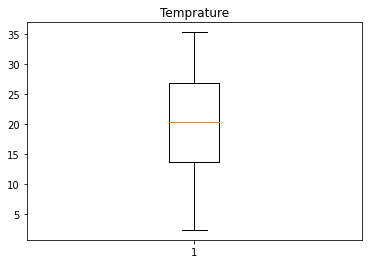

In [28]:
#Box plot for the Temprature column
plt.boxplot(bike_df.temp)
plt.title("Temprature")
plt.show()

In [29]:
#describe temp values
bike_df.temp.describe()

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64

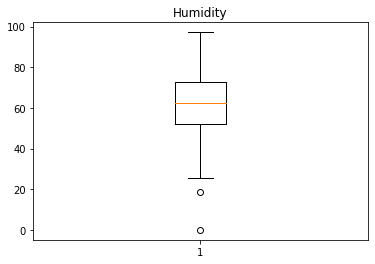

In [30]:
#Box plot for the Humidity column
plt.boxplot(bike_df.hum)
plt.title("Humidity")
plt.show()

In [31]:
#describe hum values
bike_df.hum.describe()

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64

In [32]:
#Check the humidity less then 20
bike_df[bike_df.hum < 20]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,registered,cnt
49,spring,2018,February,Not-holiday,Saturday,Not-working,clear,16.365847,18.7917,34.000021,1103,1635
68,spring,2018,March,Not-holiday,Thursday,Working,light,15.952731,0.0000,17.545759,577,623


In [33]:
# remove the outlier values from dataset
bike_df = bike_df[bike_df.hum > 20]

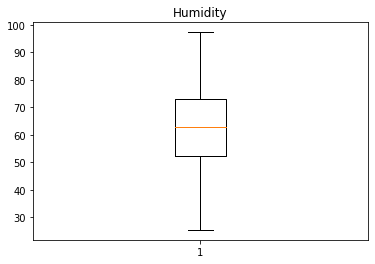

In [34]:
#check for any outliers
plt.boxplot(bike_df.hum)
plt.title("Humidity")
plt.show()

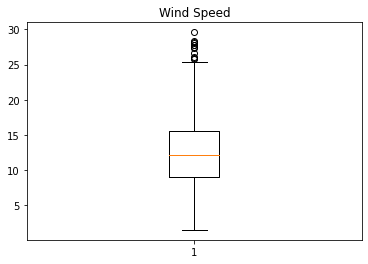

In [35]:
#Box plot for the Temprature column
plt.boxplot(bike_df.windspeed)
plt.title("Wind Speed")
plt.show()

In [36]:
#describe Windspeed values
bike_df.windspeed.describe()

count    728.000000
mean      12.727880
std        5.139840
min        1.500244
25%        9.031466
50%       12.125057
75%       15.624735
max       29.584721
Name: windspeed, dtype: float64

In [37]:
#Check the windspeed greater then 27
bike_df[bike_df.windspeed > 27]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,registered,cnt
44,spring,2018,February,Not-holiday,Monday,Working,clear,17.015000,37.5833,27.999836,1705,1913
292,winter,2018,October,Not-holiday,Thursday,Working,clear,19.509153,63.6250,28.292425,3724,4195
382,spring,2019,January,Not-holiday,Wednesday,Working,clear,12.436653,44.3333,27.833743,3267,3376
407,spring,2019,February,Not-holiday,Sunday,Not-working,clear,5.227500,46.4583,27.417204,1456,1529
420,spring,2019,February,Not-holiday,Saturday,Not-working,clear,11.924153,39.5833,28.250014,2415,2732
431,spring,2019,March,Not-holiday,Thursday,Working,clear,21.627500,56.7500,29.584721,4896,5382
432,spring,2019,March,Not-holiday,Friday,Working,cloudy,16.844153,40.7083,27.791600,4122,4569
720,spring,2019,December,Not-holiday,Saturday,Not-working,clear,10.899153,44.1250,27.292182,1544,1749


In [38]:
# remove the outlier values from dataset
bike_df = bike_df[bike_df.windspeed < 27]

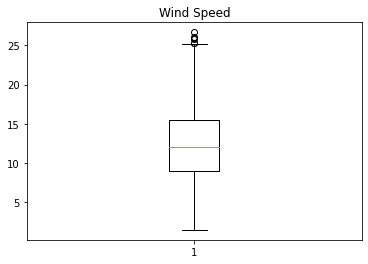

In [39]:
#Check for Outliers
plt.boxplot(bike_df.windspeed)
plt.title("Wind Speed")
plt.show()

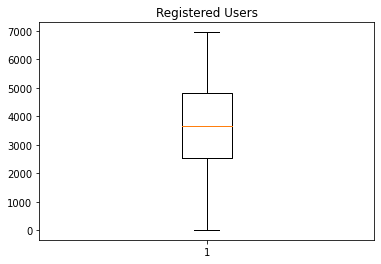

In [40]:
#Box plot for the Temprature column
plt.boxplot(bike_df.registered)
plt.title("Registered Users")
plt.show()

In [41]:
#describe Registered values
bike_df.registered.describe()

count     720.000000
mean     3675.116667
std      1555.971192
min        20.000000
25%      2535.750000
50%      3676.500000
75%      4802.500000
max      6946.000000
Name: registered, dtype: float64

In [42]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,registered,cnt
0,spring,2018,January,Not-holiday,Saturday,Not-working,cloudy,14.110847,80.5833,10.749882,654,985
1,spring,2018,January,Not-holiday,Sunday,Not-working,cloudy,14.902598,69.6087,16.652113,670,801
2,spring,2018,January,Not-holiday,Monday,Working,clear,8.050924,43.7273,16.636703,1229,1349
3,spring,2018,January,Not-holiday,Tuesday,Working,clear,8.200000,59.0435,10.739832,1454,1562
4,spring,2018,January,Not-holiday,Wednesday,Working,clear,9.305237,43.6957,12.522300,1518,1600


In [43]:
# info about the data set
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      720 non-null    object 
 1   yr          720 non-null    object 
 2   mnth        720 non-null    object 
 3   holiday     720 non-null    object 
 4   weekday     720 non-null    object 
 5   workingday  720 non-null    object 
 6   weathersit  720 non-null    object 
 7   temp        720 non-null    float64
 8   hum         720 non-null    float64
 9   windspeed   720 non-null    float64
 10  registered  720 non-null    int64  
 11  cnt         720 non-null    int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 73.1+ KB


<font color='Green' size='3'><b>Inference :</b></font> 
All the variable in the dataset have been cleaned both categorical and numerical variables.

*   Un-required columns removed
*   Categorical variables treated
*   Outliers treated
*   Data set is clean an no Null values exist in the dataset

#<font color='33E8FF' size='5'><b>EDA</b></font>

Here we will perform the following:

1.   Visualization of Variables
2.   Univarite/Bi-Variate Analysis

<Figure size 1440x864 with 0 Axes>

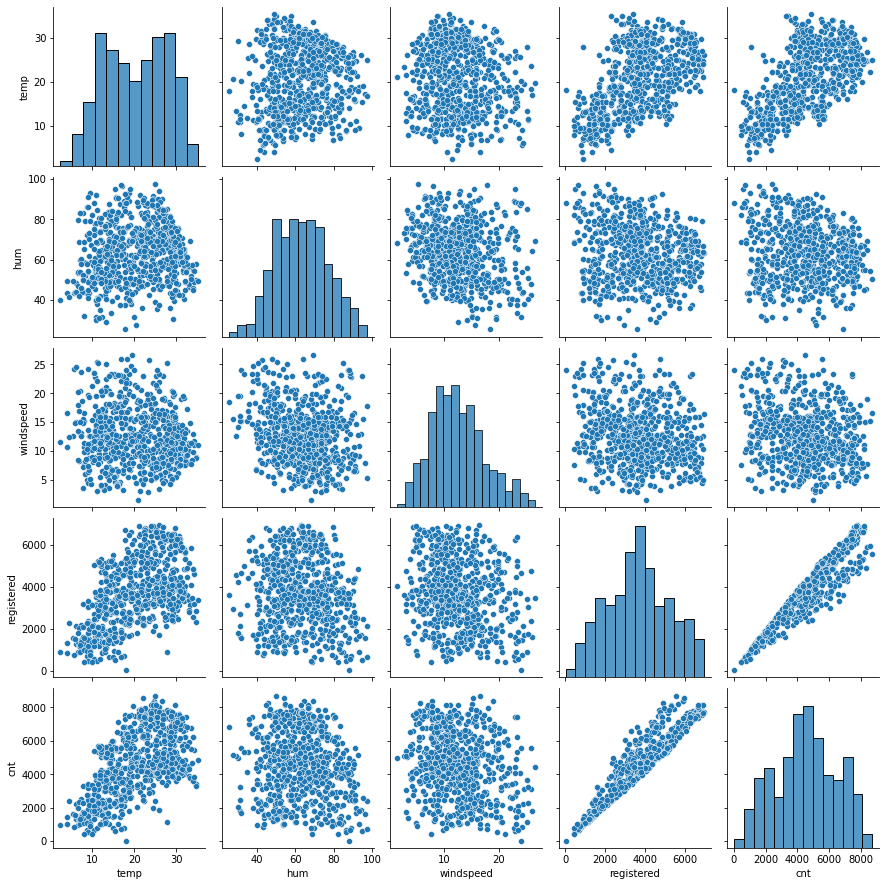

In [44]:
#visualizing of numeric variables
plt.figure(figsize=(20, 12))
sns.pairplot(bike_df)
plt.show()

<font color='Green' size='3'><b>Inference :</b></font> 
We can validate the registered and Temperature have linear relation and high correlation with CNT.

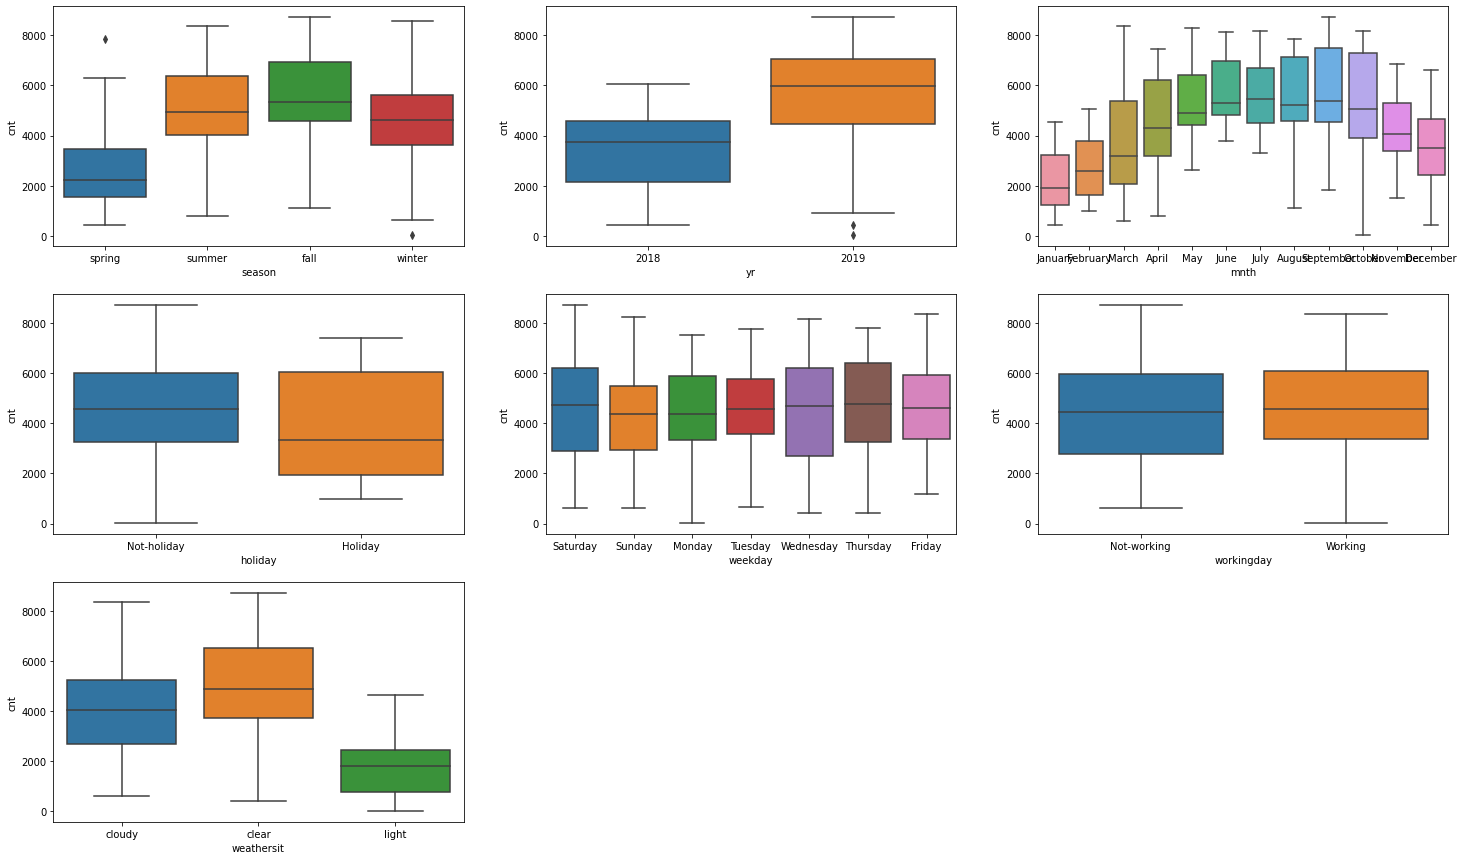

In [45]:
#visualizing of categorical variables using boxplot
plt.figure(figsize=(25, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)

plt.show()

<font color='Green' size='3'><b>Inference :</b></font> 
We can conclude that Season,Month, Weather have high factors for CNT variable.

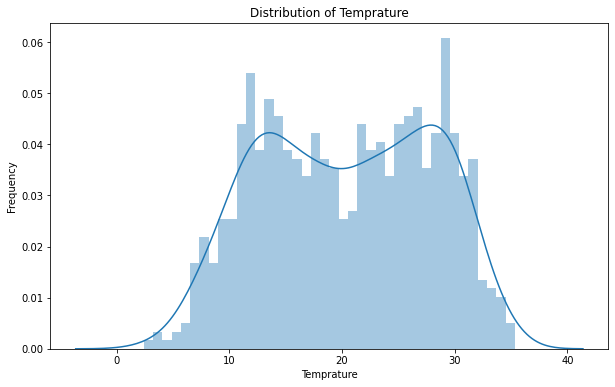

In [46]:
# Distribution of Temprature
plt.figure(figsize=(10,6))
sns.distplot(bike_df.temp,bins=40)
plt.title("Distribution of Temprature")
plt.xlabel("Temprature")
plt.ylabel('Frequency')
plt.show()

<font color='Green' size='3'><b>Inference :</b></font> 
We can conclude that temprature is normally distributed between 10 to 30.

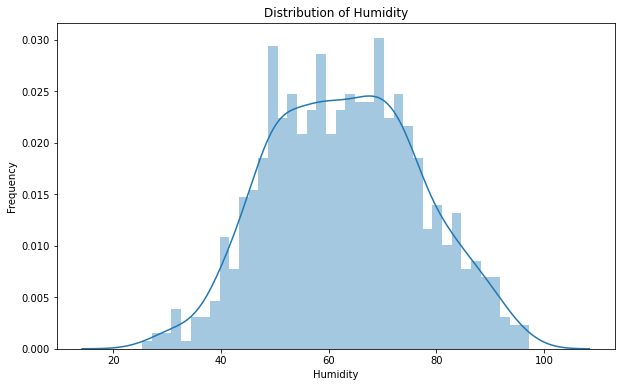

In [47]:
# Distribution of Humidity
plt.figure(figsize=(10,6))
sns.distplot(bike_df.hum,bins=40)
plt.title("Distribution of Humidity")
plt.xlabel("Humidity")
plt.ylabel("Frequency")
plt.show()

<font color='Green' size='3'><b>Inference :</b></font> 

We can conclude that Humidity is normally distributed between 50 to 70.

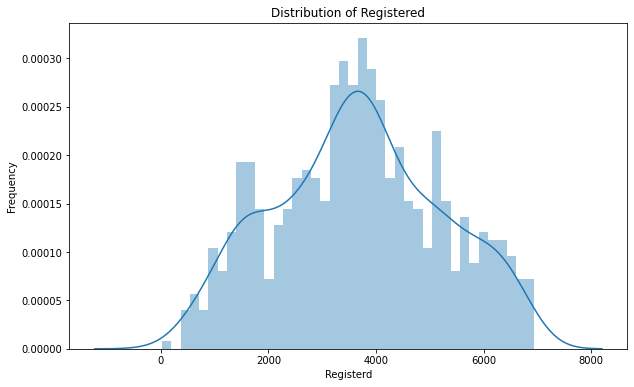

In [48]:
# Distribution of Humidity
plt.figure(figsize=(10,6))
sns.distplot(bike_df.registered,bins=40)
plt.title("Distribution of Registered")
plt.xlabel("Registerd")
plt.ylabel("Frequency")
plt.show()

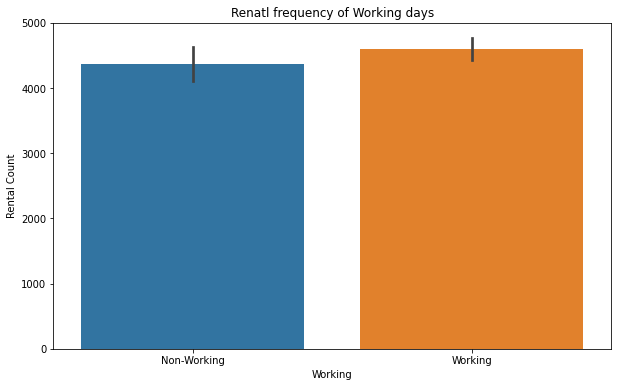

In [49]:
#count of Working Day/Non - Working with respect to bike rental
plt.figure(figsize=(10,6))
fig=sns.barplot(x= bike_df.workingday,y=bike_df.cnt,dodge=True)
plt.title("Renatl frequency of Working days")
plt.xlabel("Working")
plt.ylabel("Rental Count")
fig.set_xticklabels(['Non-Working','Working'])
plt.show()

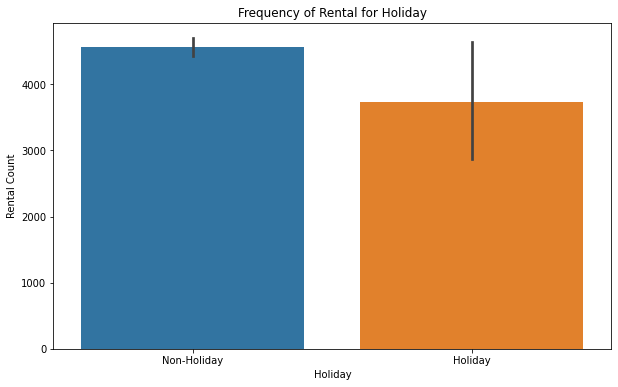

In [50]:
#count of Holidays with respect ot Bike Rental
plt.figure(figsize=(10,6))
fig = sns.barplot(x= bike_df.holiday,y=bike_df.cnt)
plt.title("Frequency of Rental for Holiday")
plt.xlabel("Holiday")
plt.ylabel("Rental Count")
fig.set_xticklabels(['Non-Holiday','Holiday'])
plt.show()

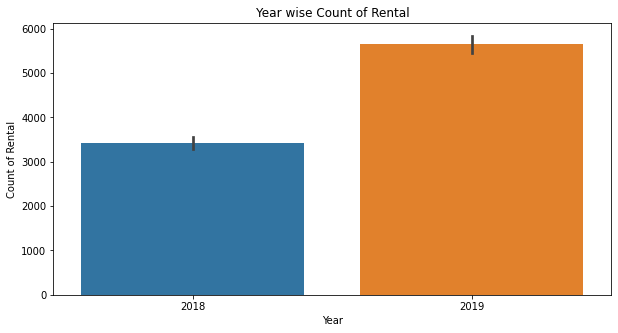

In [51]:
#count of Rental with respect to Year
plt.figure(figsize = (10, 5))
fig=sns.barplot(x = bike_df.yr, y = bike_df.cnt)
plt.title("Year wise Count of Rental")
plt.xlabel("Year")
plt.ylabel("Count of Rental")
fig.set_xticklabels(['2018','2019'])
plt.show()

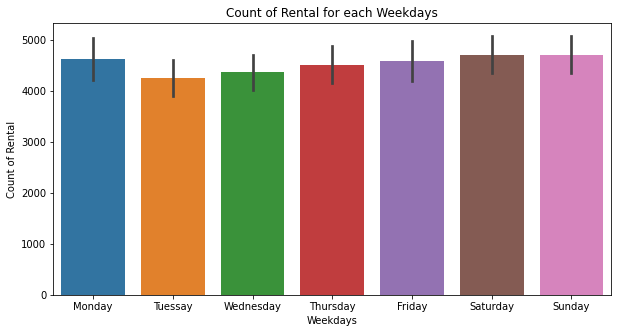

In [52]:
#Count of Rental for each Weekdays
plt.figure(figsize = (10, 5))
fig=sns.barplot(x = bike_df.weekday, y = bike_df.cnt)
plt.title("Count of Rental for each Weekdays")
plt.xlabel("Weekdays")
plt.ylabel("Count of Rental")
fig.set_xticklabels(['Monday','Tuessay','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.show()

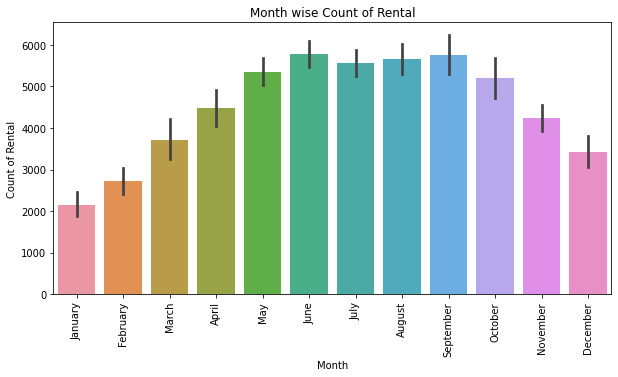

In [53]:
#count of Rental Month wise
plt.figure(figsize = (10, 5))
sns.barplot(x = bike_df.mnth, y = bike_df.cnt)
plt.title("Month wise Count of Rental")
plt.xlabel("Month")
plt.ylabel("Count of Rental")
plt.xticks(rotation = 90) 
plt.show()

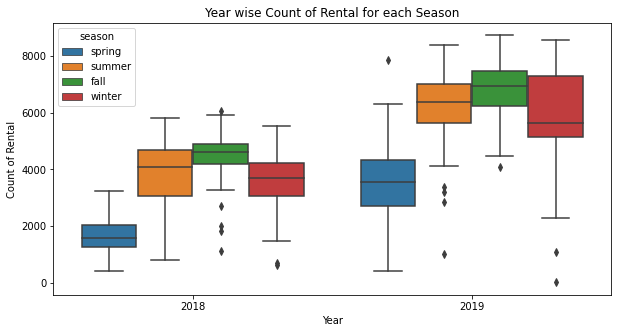

In [54]:
#count of rental for Season wise with Year
plt.figure(figsize = (10, 5))
sns.boxplot(x = bike_df.yr, y = bike_df.cnt, hue = bike_df.season)
plt.title("Year wise Count of Rental for each Season")
plt.xlabel("Year")
plt.ylabel("Count of Rental")
plt.show()

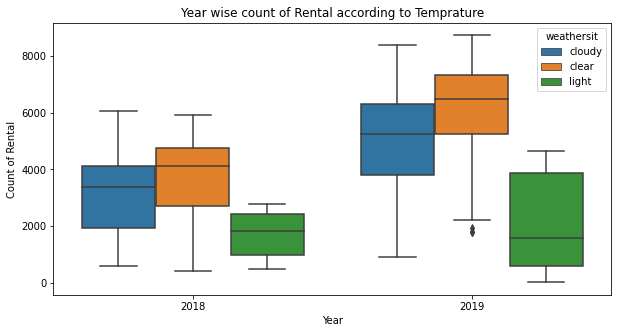

In [55]:
#count of Season wise Year
plt.figure(figsize = (10, 5))
sns.boxplot(x = bike_df.yr, y = bike_df.cnt, hue = bike_df.weathersit)
plt.title("Year wise count of Rental according to Temprature")
plt.xlabel("Year")
plt.ylabel("Count of Rental")
plt.show()

### <font color='Green' size='5'><b>Analysis & Observations :</b></font> 
Following observation and analyis can be done from the dataset

*   The count of bike rentals increases yearly from 2018 to 2019
*   Rental of bike on Working days are more than compare to non-working days
*   Rental count increases when the Temprature is Clear followed by Cloudy
*   During Fall season the bike rental is more as compared to other season
*   Remtal count is more in Weekdays as compared to Weekends

#<font color='33E8FF' size='5'><b>Data Preparation</b></font>

Now our dataset has many categorical columns.

But in order to fit a regression line, we would need numerical values and not string. Hence, we would convert them to 1s and 0s.

We woold create Dummy encoding for Season and Weather

Create encoding for Weekdays and Month

### **Dummy Variables**

In [56]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'season'
season = pd.get_dummies(bike_df.season)

In [57]:
# Check what the dataset 'season'
season.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


Now, we don't need four columns. we can drop the fall column, as the type of season can be identified with three columns where —

* 000 will correspond to fall<br>
* 100 will correspond to spring<br>
* 010 will correspond to summer<br>
* 001 will correspond to winter<br>

In [58]:
# Let's drop the first column from status df using 'drop_first = True'
season = pd.get_dummies(bike_df.season,drop_first=True)

In [59]:
# Add the results to the original housing dataframe
bike_df = pd.concat([bike_df, season], axis = 1)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,registered,cnt,spring,summer,winter
0,spring,2018,January,Not-holiday,Saturday,Not-working,cloudy,14.110847,80.5833,10.749882,654,985,1,0,0
1,spring,2018,January,Not-holiday,Sunday,Not-working,cloudy,14.902598,69.6087,16.652113,670,801,1,0,0
2,spring,2018,January,Not-holiday,Monday,Working,clear,8.050924,43.7273,16.636703,1229,1349,1,0,0
3,spring,2018,January,Not-holiday,Tuesday,Working,clear,8.200000,59.0435,10.739832,1454,1562,1,0,0
4,spring,2018,January,Not-holiday,Wednesday,Working,clear,9.305237,43.6957,12.522300,1518,1600,1,0,0


In [60]:
# Drop 'season' as we have created the dummies for it and its not required
bike_df.drop(['season'],axis=1,inplace=True)
bike_df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,registered,cnt,spring,summer,winter
0,2018,January,Not-holiday,Saturday,Not-working,cloudy,14.110847,80.5833,10.749882,654,985,1,0,0
1,2018,January,Not-holiday,Sunday,Not-working,cloudy,14.902598,69.6087,16.652113,670,801,1,0,0
2,2018,January,Not-holiday,Monday,Working,clear,8.050924,43.7273,16.636703,1229,1349,1,0,0
3,2018,January,Not-holiday,Tuesday,Working,clear,8.200000,59.0435,10.739832,1454,1562,1,0,0
4,2018,January,Not-holiday,Wednesday,Working,clear,9.305237,43.6957,12.522300,1518,1600,1,0,0


In [61]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weather'
weather = pd.get_dummies(bike_df.weathersit)

In [62]:
# Check what the dataset 'weather'
weather.head()

,clear,cloudy,light
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


Now, we don't need three columns. we can drop the 'clear' column, as the type of weather can be identified with two columns where —

* 00 will correspond to clear
* 10 will correspond to cloudy
* 01 will correspond to light

In [63]:
# Let's drop the first column from weather df using 'drop_first = True'
weather = pd.get_dummies(bike_df.weathersit,drop_first=True)

In [64]:
# Add the results to the original housing dataframe
bike_df = pd.concat([bike_df, weather], axis = 1)
bike_df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,registered,cnt,spring,summer,winter,cloudy,light
0,2018,January,Not-holiday,Saturday,Not-working,cloudy,14.110847,80.5833,10.749882,654,985,1,0,0,1,0
1,2018,January,Not-holiday,Sunday,Not-working,cloudy,14.902598,69.6087,16.652113,670,801,1,0,0,1,0
2,2018,January,Not-holiday,Monday,Working,clear,8.050924,43.7273,16.636703,1229,1349,1,0,0,0,0
3,2018,January,Not-holiday,Tuesday,Working,clear,8.200000,59.0435,10.739832,1454,1562,1,0,0,0,0
4,2018,January,Not-holiday,Wednesday,Working,clear,9.305237,43.6957,12.522300,1518,1600,1,0,0,0,0


In [65]:
# Drop 'weathersit' as we have created the dummies for it and its not required
bike_df.drop(['weathersit'],axis=1,inplace=True)
bike_df.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,registered,cnt,spring,summer,winter,cloudy,light
0,2018,January,Not-holiday,Saturday,Not-working,14.110847,80.5833,10.749882,654,985,1,0,0,1,0
1,2018,January,Not-holiday,Sunday,Not-working,14.902598,69.6087,16.652113,670,801,1,0,0,1,0
2,2018,January,Not-holiday,Monday,Working,8.050924,43.7273,16.636703,1229,1349,1,0,0,0,0
3,2018,January,Not-holiday,Tuesday,Working,8.200000,59.0435,10.739832,1454,1562,1,0,0,0,0
4,2018,January,Not-holiday,Wednesday,Working,9.305237,43.6957,12.522300,1518,1600,1,0,0,0,0


### **Mapping**

In [66]:
# Applying the function to the housing list to convert to 0 and 1
bike_df.holiday = bike_df.holiday.map({'Holiday': 1, "Not-holiday": 0})

In [67]:
# Check the dataframe now
bike_df.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,registered,cnt,spring,summer,winter,cloudy,light
0,2018,January,0,Saturday,Not-working,14.110847,80.5833,10.749882,654,985,1,0,0,1,0
1,2018,January,0,Sunday,Not-working,14.902598,69.6087,16.652113,670,801,1,0,0,1,0
2,2018,January,0,Monday,Working,8.050924,43.7273,16.636703,1229,1349,1,0,0,0,0
3,2018,January,0,Tuesday,Working,8.200000,59.0435,10.739832,1454,1562,1,0,0,0,0
4,2018,January,0,Wednesday,Working,9.305237,43.6957,12.522300,1518,1600,1,0,0,0,0


In [68]:
#mapping  0:Not-working and 1:Working to workingday variable
bike_df.workingday = bike_df.workingday.map({'Not-working': 0,'Working': 1})

In [69]:
# Check the dataframe now
bike_df.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,registered,cnt,spring,summer,winter,cloudy,light
0,2018,January,0,Saturday,0,14.110847,80.5833,10.749882,654,985,1,0,0,1,0
1,2018,January,0,Sunday,0,14.902598,69.6087,16.652113,670,801,1,0,0,1,0
2,2018,January,0,Monday,1,8.050924,43.7273,16.636703,1229,1349,1,0,0,0,0
3,2018,January,0,Tuesday,1,8.200000,59.0435,10.739832,1454,1562,1,0,0,0,0
4,2018,January,0,Wednesday,1,9.305237,43.6957,12.522300,1518,1600,1,0,0,0,0


In [70]:
#Encoding for 'mnth' and weekday variable
# weekday : day of the week ( 1 = Monday, 2 = Tuesay, 3 = Wednesday....7 = Sunday)
#
def weekdaystr_value(x):
  if x == 'Monday' : return 1
  elif x == 'Tuesday' : return 2
  elif x == 'Wednesday' : return 3
  elif x == 'Thursday' : return 4
  elif x == 'Friday' : return 5
  elif x == 'Saturday' : return 6 
  elif x == 'Sunday' : return 7 
bike_df.weekday = bike_df.weekday.apply(weekdaystr_value)

In [71]:
# Check the dataframe now
bike_df.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,registered,cnt,spring,summer,winter,cloudy,light
0,2018,January,0,6,0,14.110847,80.5833,10.749882,654,985,1,0,0,1,0
1,2018,January,0,7,0,14.902598,69.6087,16.652113,670,801,1,0,0,1,0
2,2018,January,0,1,1,8.050924,43.7273,16.636703,1229,1349,1,0,0,0,0
3,2018,January,0,2,1,8.200000,59.0435,10.739832,1454,1562,1,0,0,0,0
4,2018,January,0,3,1,9.305237,43.6957,12.522300,1518,1600,1,0,0,0,0


In [72]:
# formulate month ( 1 to 12)
def monthstr_value(x):
  if x == 'January': return 1
  elif x == 'February': return 2
  elif x == 'March': return 3
  elif x == 'April': return 4
  elif x == 'May': return 5
  elif x == 'June': return 6
  elif x == 'July': return 7
  elif x == 'August': return 8
  elif x == 'September': return 9
  elif x == 'October': return 10
  elif x == 'November': return 11
  elif x == 'December': return 12
bike_df.mnth = bike_df.mnth.apply(monthstr_value)


In [73]:
# Check the dataframe now
bike_df.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,registered,cnt,spring,summer,winter,cloudy,light
0,2018,1,0,6,0,14.110847,80.5833,10.749882,654,985,1,0,0,1,0
1,2018,1,0,7,0,14.902598,69.6087,16.652113,670,801,1,0,0,1,0
2,2018,1,0,1,1,8.050924,43.7273,16.636703,1229,1349,1,0,0,0,0
3,2018,1,0,2,1,8.200000,59.0435,10.739832,1454,1562,1,0,0,0,0
4,2018,1,0,3,1,9.305237,43.6957,12.522300,1518,1600,1,0,0,0,0


In [74]:
#mapping  0:Not-working and 1:Working to workingday variable
bike_df.yr = bike_df.yr.map({'2018': 0,'2019': 1})

In [75]:
# Check the dataframe now
bike_df.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,registered,cnt,spring,summer,winter,cloudy,light
0,0,1,0,6,0,14.110847,80.5833,10.749882,654,985,1,0,0,1,0
1,0,1,0,7,0,14.902598,69.6087,16.652113,670,801,1,0,0,1,0
2,0,1,0,1,1,8.050924,43.7273,16.636703,1229,1349,1,0,0,0,0
3,0,1,0,2,1,8.200000,59.0435,10.739832,1454,1562,1,0,0,0,0
4,0,1,0,3,1,9.305237,43.6957,12.522300,1518,1600,1,0,0,0,0


#<font color='33E8FF' size='5'><b>Splitting the Data into Training and Testing Sets</b></font>

Here we will perform the following:

1.   Splitting the data set into Training and Testing Set
2.   Scaling the data set

In [76]:
#import the library
from sklearn.model_selection import train_test_split

In [77]:
# Splittomg train and test data sets, 70% training and 30% for testing the model
df_train, df_test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [78]:
# check the data frame for training and testing
df_train.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,registered,cnt,spring,summer,winter,cloudy,light
424,1,3,0,4,1,19.919153,61.5417,15.208129,4665,4990,1,0,0,0,0
728,1,12,0,7,0,10.489153,48.3333,23.500518,1432,1796,1,0,0,0,0
481,1,4,0,5,1,18.757500,40.0833,23.291411,5219,6233,0,1,0,0,0
114,0,4,0,1,1,24.873347,77.6667,12.417311,3300,4073,0,1,0,0,0
581,1,8,0,7,0,31.535847,65.2500,19.458207,3757,5464,0,0,0,0,0


In [79]:
df_test.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,registered,cnt,spring,summer,winter,cloudy,light
201,0,7,0,4,1,33.415000,69.1250,14.875407,3152,3784,0,0,0,1,0
496,1,5,0,6,0,23.130847,48.0417,8.249911,4807,7429,0,1,0,0,0
369,1,1,0,4,1,10.899153,52.4167,8.709129,3132,3272,1,0,0,0,0
629,1,9,0,6,0,26.650000,64.6667,19.000061,5883,8395,0,0,0,0,0
645,1,10,1,1,0,15.716653,70.9583,12.708493,4604,5478,0,0,1,1,0


### **Scaling**

Here we can see that few columns have small integer values and others have large values. So we need to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. 

For this will use **MinMax** scaling

In [80]:
# import library
from sklearn.preprocessing import MinMaxScaler

In [81]:
#instantiate
scaler = MinMaxScaler()

In [82]:
#applying to all variable excep dummy and 0-1 variables
col_vars = ['mnth','weekday','temp','hum','windspeed','registered','cnt']
# scaling the collumns in the train data set using fit_transform.
df_train[col_vars] = scaler.fit_transform(df_train[col_vars])

In [83]:
# check the data frame for training
df_train.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,registered,cnt,spring,summer,winter,cloudy,light
424,1,0.181818,0,0.500000,1,0.531692,0.502900,0.514971,0.670661,0.595683,1,0,0,0,0
728,1,1.000000,0,1.000000,0,0.245101,0.319025,0.865984,0.203869,0.212710,1,0,0,0,0
481,1,0.272727,0,0.666667,1,0.496388,0.204176,0.857133,0.750650,0.744724,0,1,0,0,0
114,0,0.272727,0,0.000000,1,0.682257,0.727379,0.396837,0.473578,0.485731,0,1,0,0,0
581,1,0.636364,0,1.000000,0,0.884740,0.554524,0.694875,0.539561,0.652518,0,0,0,0,0


In [84]:
# describe the train data set
df_train.describe()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,registered,cnt,spring,summer,winter,cloudy,light
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,0.504970,0.513284,0.027833,0.506958,0.675944,0.540539,0.535121,0.405943,0.524083,0.537530,0.230616,0.252485,0.252485,0.371769,0.025845
std,0.500473,0.314945,0.164658,0.337140,0.468487,0.225255,0.194654,0.211803,0.228802,0.233941,0.421647,0.434870,0.434870,0.483758,0.158830
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.272727,0.000000,0.166667,0.000000,0.345824,0.393851,0.250426,0.353162,0.365228,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.545455,0.000000,0.500000,1.000000,0.543115,0.534223,0.380933,0.524978,0.545923,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.818182,0.000000,0.833333,1.000000,0.735215,0.678074,0.531409,0.690081,0.717806,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


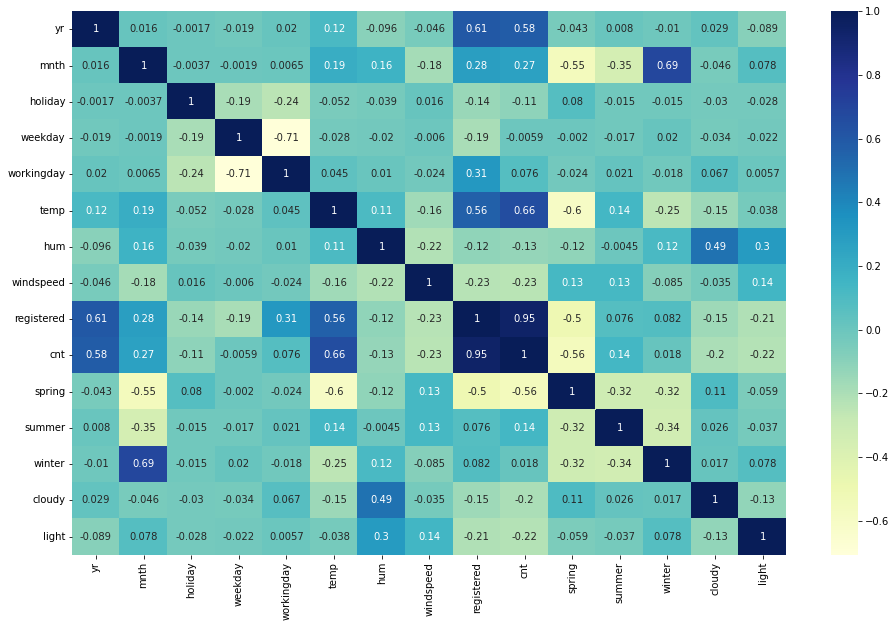

In [85]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### **Dividing into X & Y datasets for model building**

In [86]:
y_train = df_train.pop('cnt')
X_train = df_train

In [87]:
y_train.head()

424    0.595683
728    0.212710
481    0.744724
114    0.485731
581    0.652518
Name: cnt, dtype: float64

#<font color='33E8FF' size='5'><b>Building the model</b></font>

We have the opotion to build model using statsmodel or Linear Regression RFE automated method. As the no. of variable in dataset are few we will use the statmodel api to build the model using the OLS function.

### **Build Model**
Being a limited dataset we would would model by adding all values and then remove features based on P values and VIF values.

P values > 0.05  and VIF > 5 are considered high and would be removed from the model dataset. 

Our aim is to achieved highest R-Squared and Adj.R-Squared Values

In [88]:
# import the library
import statsmodels.api as sm

In [89]:
# build th linear model
X_train_sm = sm.add_constant(X_train)

# crete model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model_1 = lr.fit()

# Params
lr_model_1.params

const         0.050276
yr            0.010422
mnth          0.009523
holiday      -0.026707
weekday       0.018785
workingday   -0.098962
temp          0.152858
hum          -0.040076
windspeed    -0.022292
registered    0.913710
spring        0.000180
summer        0.030217
winter       -0.004790
cloudy       -0.004588
light        -0.020532
dtype: float64

In [90]:
# Print the summary
print(lr_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     995.0
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:44:28   Log-Likelihood:                 869.03
No. Observations:                 503   AIC:                            -1708.
Df Residuals:                     488   BIC:                            -1645.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0503      0.019      2.641      0.0

Looking at this we can infer that some variable have high p-Value(i.e. p-Value > 0.05) and they seems to be insignificant.

Lets check the VIF values for this variable

**VIF**

Variance Inflation Factor or VIF, gives idea about how feature are correlated with each other. 

The formula for VIF is: 1 / 1 - R^2


In [91]:
# import the library
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [92]:
# Calculate VIF for all the predictors from Train set
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)   # round values to 2 decimals
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,95.69
10,spring,5.70
9,registered,5.40
6,temp,4.39
12,winter,3.74
2,mnth,3.51
5,workingday,3.33
4,weekday,2.79
11,summer,2.61
1,yr,2.54


We can infer some variables have VIF more than 5 and can be removed.

**Dropping the variable and updating the model**

As visible from the summary and the VIF . The variable '**spring**' has a high p-value and VIF values. 

In [93]:
# Dropping highly correlated variables and insignificant variables
X_train_sm = X_train_sm.drop('spring', axis=1)

In [94]:
X_train_sm.head()

,const,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,registered,summer,winter,cloudy,light
424,1.0,1,0.181818,0,0.500000,1,0.531692,0.502900,0.514971,0.670661,0,0,0,0
728,1.0,1,1.000000,0,1.000000,0,0.245101,0.319025,0.865984,0.203869,0,0,0,0
481,1.0,1,0.272727,0,0.666667,1,0.496388,0.204176,0.857133,0.750650,1,0,0,0
114,1.0,0,0.272727,0,0.000000,1,0.682257,0.727379,0.396837,0.473578,1,0,0,0
581,1.0,1,0.636364,0,1.000000,0,0.884740,0.554524,0.694875,0.539561,0,0,0,0


In [95]:
# Build a second fitted model
X_train_sm = sm.add_constant(X_train_sm)


In [96]:
# crete model
lr_2 = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model_2 = lr_2.fit()

# Params
lr_model_2.params

const         0.050482
yr            0.010441
mnth          0.009441
holiday      -0.026691
weekday       0.018787
workingday   -0.098951
temp          0.152690
hum          -0.040044
windspeed    -0.022285
registered    0.913655
summer        0.030133
winter       -0.004852
cloudy       -0.004596
light        -0.020579
dtype: float64

In [97]:
# Print the summary
print(lr_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     1074.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:44:28   Log-Likelihood:                 869.03
No. Observations:                 503   AIC:                            -1710.
Df Residuals:                     489   BIC:                            -1651.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0505      0.014      3.541      0.0

In [98]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)   # round values to 2 decimals
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,53.75
9,registered,5.25
5,workingday,3.30
11,winter,3.02
6,temp,2.99
2,mnth,2.85
4,weekday,2.79
1,yr,2.46
7,hum,2.03
12,cloudy,1.72


Dropping highly insignificant variables holiday which has p-value 0.66 which is highest and it p-Vaues is grater then variable with highes VIF value registered.

p-Value takes precedence over VIF


In [99]:
# dropping highest insignificant variable
X_train_sm = X_train_sm.drop('holiday', axis=1)

In [100]:
# Build a second fitted model
X_train_sm = sm.add_constant(X_train_sm)

# crete model
lr_3 = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model_3 = lr_3.fit()

# Params
lr_model_3.params

const         0.038909
yr            0.009708
mnth          0.008285
weekday       0.028123
workingday   -0.092364
temp          0.152499
hum          -0.038817
windspeed    -0.021594
registered    0.916787
summer        0.029970
winter       -0.004438
cloudy       -0.004501
light        -0.019237
dtype: float64

In [101]:
# Print the summary
print(lr_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     1157.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:44:28   Log-Likelihood:                 867.28
No. Observations:                 503   AIC:                            -1709.
Df Residuals:                     490   BIC:                            -1654.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0389      0.013      3.032      0.0

In [102]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)   # round values to 2 decimals
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,43.34
8,registered,5.21
10,winter,3.02
5,temp,2.99
2,mnth,2.84
4,workingday,2.56
1,yr,2.45
3,weekday,2.02
6,hum,2.02
11,cloudy,1.72


Dropping highly insignificant variable '**winter**' which has p-value 0.0569



In [103]:
# dropping highest insignificant variable
X_train_sm = X_train_sm.drop('winter', axis=1)

In [104]:
# Build a second fitted model
X_train_sm = sm.add_constant(X_train_sm)

# crete model
lr_4 = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model_4 = lr_4.fit()

# Params
lr_model_4.params

const         0.038949
yr            0.010362
mnth          0.004232
weekday       0.028148
workingday   -0.091885
temp          0.157425
hum          -0.039965
windspeed    -0.021997
registered    0.913517
summer        0.030227
cloudy       -0.004436
light        -0.019553
dtype: float64

In [105]:
# Print the summary
print(lr_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     1264.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:44:28   Log-Likelihood:                 867.12
No. Observations:                 503   AIC:                            -1710.
Df Residuals:                     491   BIC:                            -1660.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0389      0.013      3.037      0.0

In [106]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)   # round values to 2 decimals
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,43.34
8,registered,4.75
4,workingday,2.52
1,yr,2.36
3,weekday,2.02
5,temp,1.99
6,hum,1.98
10,cloudy,1.72
2,mnth,1.52
11,light,1.44


Dropping highly insignificant variable '**mnth**' which has p-value 0.0580

In [107]:
# dropping highest insignificant variable
X_train_sm = X_train_sm.drop('mnth', axis=1)

In [108]:
# Build a second fitted model
X_train_sm = sm.add_constant(X_train_sm)

# crete model
lr_5 = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model_5 = lr_5.fit()

# Params
lr_model_5.params

const         0.039799
yr            0.009369
weekday       0.028023
workingday   -0.092528
temp          0.156693
hum          -0.038645
windspeed    -0.021862
registered    0.917753
summer        0.029069
cloudy       -0.004425
light        -0.018560
dtype: float64

In [109]:
# Print the summary
print(lr_model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     1392.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:44:28   Log-Likelihood:                 866.96
No. Observations:                 503   AIC:                            -1712.
Df Residuals:                     492   BIC:                            -1665.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0398      0.013      3.128      0.0

In [110]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)   # round values to 2 decimals
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,42.72
7,registered,3.95
3,workingday,2.44
1,yr,2.15
2,weekday,2.02
4,temp,1.97
5,hum,1.92
9,cloudy,1.72
10,light,1.42
6,windspeed,1.24


Dropping highly insignificant variable '**cloudy**' which has p-value 0.402

In [111]:
# dropping highest insignificant variable
X_train_sm = X_train_sm.drop('cloudy', axis=1)

In [112]:
# Build a second fitted model
X_train_sm = sm.add_constant(X_train_sm)

# crete model
lr_6 = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model_6 = lr_6.fit()

# Params
lr_model_6.params

const         0.041397
yr            0.008368
weekday       0.027694
workingday   -0.093379
temp          0.157682
hum          -0.045407
windspeed    -0.022678
registered    0.920305
summer        0.028895
light        -0.013695
dtype: float64

In [113]:
# Print the summary
print(lr_model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     1548.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:44:28   Log-Likelihood:                 866.60
No. Observations:                 503   AIC:                            -1713.
Df Residuals:                     493   BIC:                            -1671.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.013      3.292      0.0

In [114]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)   # round values to 2 decimals
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,41.76
7,registered,3.82
3,workingday,2.38
1,yr,2.05
2,weekday,2.01
4,temp,1.95
5,hum,1.27
6,windspeed,1.23
9,light,1.20
8,summer,1.05


Dropping highly insignificant variable '**light**' which has p-value 0.308

In [115]:
# dropping highest insignificant variable
X_train_sm = X_train_sm.drop('light', axis=1)

In [116]:
# Build a second fitted model
X_train_sm = sm.add_constant(X_train_sm)

# crete model
lr_7 = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model_7 = lr_7.fit()

# Params
lr_model_7.params

const         0.043151
yr            0.007922
weekday       0.027717
workingday   -0.093780
temp          0.156673
hum          -0.048796
windspeed    -0.024454
registered    0.922955
summer        0.029163
dtype: float64

In [117]:
# Print the summary
print(lr_model_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     1741.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:44:28   Log-Likelihood:                 866.07
No. Observations:                 503   AIC:                            -1714.
Df Residuals:                     494   BIC:                            -1676.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0432      0.012      3.464      0.0

Dropping highly insignificant variable '**yr**' which has p-value 0.155

In [118]:
# dropping highest insignificant variable
X_train_sm = X_train_sm.drop('yr', axis=1)

In [119]:
# Build a second fitted model
X_train_sm = sm.add_constant(X_train_sm)

# crete model
lr_8 = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model_8 = lr_8.fit()

# Params
lr_model_8.params

const         0.042460
weekday       0.027060
workingday   -0.096310
temp          0.149722
hum          -0.046984
windspeed    -0.022162
registered    0.939437
summer        0.028977
dtype: float64

In [120]:
# Print the summary
print(lr_model_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     1986.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:44:28   Log-Likelihood:                 865.04
No. Observations:                 503   AIC:                            -1714.
Df Residuals:                     495   BIC:                            -1680.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0425      0.012      3.408      0.0

In [121]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)   # round values to 2 decimals
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,40.92
2,workingday,2.19
1,weekday,2.00
6,registered,1.88
3,temp,1.62
5,windspeed,1.16
4,hum,1.15
7,summer,1.04


As the pValue and VIF both are acceptable range. We can finalize the model 8 and go ahead and make our predictions using this model.



#<font color='33E8FF' size='5'><b>Residual Analysis</b></font>

We will now validate the assumptions of residual analysis:



*   error terms are normally distributed
*   error terms are independent of each other



In [122]:
# get the predicted value from our model
y_train_pred = lr_model_8.predict(X_train_sm)

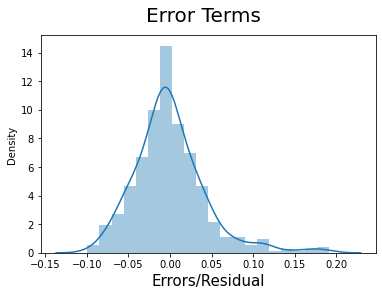

In [123]:
# residual/error terms
res = y_train - y_train_pred

# plotting the distribution of error terms
fig = plt.figure()
sns.distplot(res, bins = 20)
plt.xlabel('Errors/Residual',fontsize=15)
fig.suptitle('Error Terms',fontsize=20)
plt.show()

<font color='Green' size='3'><b>Inference :</b></font> 

We can conclude that Residuals are normally distributed with mean 0.

#<font color='33E8FF' size='5'><b>Predictions using the Model</b></font>

Prediction of the model using the test data set


## **Scaling**

In [124]:
#Let apply the same scaling steps we did on the train to test model as well

#applying to all variable excep dummy and 0-1 variables
col_vars = ['mnth','weekday','temp','hum','windspeed','registered','cnt']

# scaling the collumns in the train data set using transform.
#as the modeler is alreay learned we would only transform and not learn on the data
df_test[col_vars] = scaler.transform(df_test[col_vars])

## **Dividing into X & Y datasets for model testing**

In [125]:
y_test = df_test.pop('cnt')
X_test = df_test

In [126]:
# Adding constant variable to test dataframe
X_test_sm = sm.add_constant(X_test)

In [127]:
X_train_sm.columns

Index(['const', 'weekday', 'workingday', 'temp', 'hum', 'windspeed',
       'registered', 'summer'],
      dtype='object')

In [128]:
# Let predict using our model 8 - final model

#builiding the X test set based on the columns in X training set
X_test_sm = X_test_sm[X_train_sm.columns]

In [129]:
# making predictions
y_test_pred = lr_model_8.predict(X_test_sm)

#<font color='33E8FF' size='5'><b>Model Evaluation</b></font>

Plotting Actual Vs Predicted

Text(0, 0.5, 'y_test_pred')

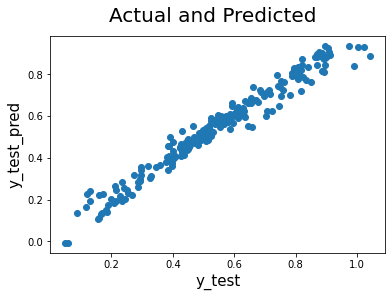

In [130]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('Actual and Predicted', fontsize = 20)             
plt.xlabel('y_test', fontsize = 15)                          
plt.ylabel('y_test_pred', fontsize = 15)  

From the abvoe we can confirm that our line is mostly linear and plot a straight line

In [131]:
# checking the r2 for the predicted views
from sklearn.metrics import r2_score

r_square = r2_score(y_true=y_test,y_pred=y_test_pred)
r_square

0.9635644930973153

#<font color='33E8FF' size='5'><b>Conclusion</b></font>

From the above we can conclude that the R2 of the model for the Train and Test set is exactly the same and its matching.

Overall we can conclude we have an pretty good model

The equation of our fitted line is

***cnt*** = 0.0271 * *weekday*  &nbsp;**-**&nbsp;  0.0963 * *workingday*  &nbsp;**+**&nbsp;  0.149 * *temp*  &nbsp;**-**&nbsp; 0.0470 *  *hum*  &nbsp;**-**&nbsp;  0.0222 * *windspeed*  &nbsp;**+**&nbsp;  0.9394 * *registered*

Thus we can conlude that:

Count of Bike Rental:


1.   Increases with increase of Registered users
2.   Increases when there is Weekdays
3.   Increases with Temprature
4.   Decreases with high humidity
5.   Decreases with high windspeed
6.   Decreases when Workingday is an non-working day or no working day


